In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel(logging.ERROR)

In [2]:
def tokenize_corpus(corpus, num_words = -1):
    if num_words > -1:
        tokenizer = Tokenizer(num_words = num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [3]:
def create_lyrics_corpus(dataset, field):
    dataset[field] = dataset[field].str.replace('[string.puntuation]', " ")
    dataset[field] = dataset[field].str.lower()

    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')

    for i in range(len(corpus)):
        corpus[i] = corpus[i].rstrip()

    corpus = [i for i in corpus if i != ' ']
    return corpus

In [4]:
dataset = pd.read_csv("D:\Data Science\Datasets\songdata.csv")[:250]
corpus = create_lyrics_corpus(dataset, 'text')

tokenizer = tokenize_corpus(corpus, num_words = 2000)
total_words = tokenizer.num_words

print(total_words)

2000


In [5]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

max_seq_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen = max_seq_len, padding = 'pre'))

input_sequences, labels = sequences[:, :-1], sequences[:, -1]

one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length = max_seq_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(total_words, activation = 'softmax')
])

In [7]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
history = model.fit(input_sequences, one_hot_labels, epochs = 100)

Epoch 1/100
1499/1499 [==============================] - 12s 7ms/step - loss: 5.9465 - accuracy: 0.0466
Epoch 2/100
1499/1499 [==============================] - 10s 7ms/step - loss: 5.5395 - accuracy: 0.0658
Epoch 3/100
1499/1499 [==============================] - 10s 7ms/step - loss: 5.3220 - accuracy: 0.0905
Epoch 4/100
1499/1499 [==============================] - 10s 7ms/step - loss: 5.1230 - accuracy: 0.1184
Epoch 5/100
1499/1499 [==============================] - 10s 7ms/step - loss: 4.9214 - accuracy: 0.1415
Epoch 6/100
1499/1499 [==============================] - 10s 7ms/step - loss: 4.7355 - accuracy: 0.1598
Epoch 7/100
1499/1499 [==============================] - 10s 7ms/step - loss: 4.5720 - accuracy: 0.1754
Epoch 8/100
1499/1499 [==============================] - 10s 7ms/step - loss: 4.4228 - accuracy: 0.1913
Epoch 9/100
1499/1499 [==============================] - 10s 7ms/step - loss: 4.2870 - accuracy: 0.2055
Epoch 10/100
1499/1499 [==============================] - 10s 7m

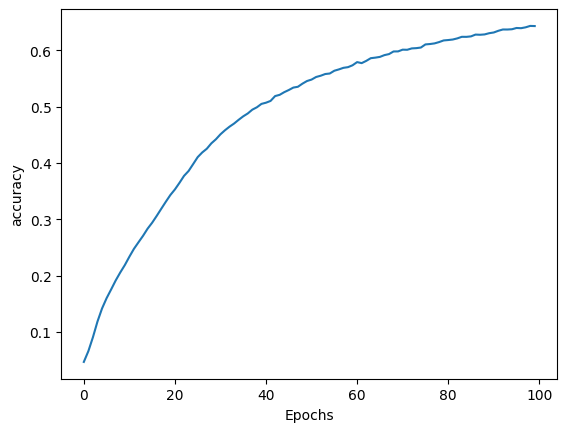

In [9]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [10]:
seed_text = 'im feeling it'
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_seq_len-1, padding = 'pre')
    predicted = np.argmax(model.predict(token_list), axis = -1)
    output_word = ' '
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text+=' '+ output_word
print(seed_text)

1/1 [==============================] - 0s 15ms/step
im feeling it it i don't care what we do it it to do the start time girl we belong together way then it low at world slowly years she midnight door ha doors tenderness rain affair thin without ask from song softly thru clean sick mother thru oh oh oh oh oh yes new you like you be your alone man with me light like love i'm mind than just done it so happy years they're for you will like this day hey door to please sombrero understand it down upon my crowd glove you speak ground house morning man understand me


In [12]:
seed_text = 'im feeling it'
next_words = 100

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen = max_seq_len-1, padding = 'pre')
predicted_probs = model.predict(token_list)[0]
predicted = np.random.choice([x for x in range(len(predicted_probs))],
                             p = predicted_probs)

print(predicted)

1/1 [==============================] - 0s 15ms/step
401


In [13]:
seed_text = 'im feeling it'
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_seq_len-1, padding = 'pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))], p = predicted_probs)

    output_word = ' '
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' ' + output_word
print(seed_text)

1/1 [==============================] - 0s 23ms/step
im feeling it went to get to make a while ask from a new crime waking much for more lovers me and you've my love affair should it done ya might ease me way when me how pain walkin' lights pain happiest last ground yonder she man get story oh so far house others hold him me again 'cause get it hot anywhere tonight it apple never a la on hold new lonely ba yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah carry man dog drunk your game yeah man could carry me and blue lord yes spit me
